In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import math

# Helper Functions

In [18]:
# Function to plot a histogram and its title
def plot_hists(histogram, title):
        plt.subplots_adjust(hspace=0.8, wspace=0.8)
        plt.plot(histogram)
        plt.title(title)
        plt.xlabel("Intensity")
        plt.ylabel("Frequency")
        plt.show()

# Problem 1

In [4]:
lena = cv2.imread("../data/midterm/lena_color_512.tif", 0)


In [5]:
# A. Intensity Resolution (Lena)
print(f"Maximum Intensity: {lena.max()}\nMinimum Intensity: {lena.min()}")
print(f"Intensity Resolution: 8-bits, 256 levels") # Smallest discernible difference in intensity

# B. Spatial Resolution (lena)
dims = lena.shape
print(f"Spatial Resolution: {dims[0]} x {dims[1]} pixels")

# C. Histogram
lena_hist = cv2.calcHist([lena], [0], None, [256], [0,256])

Maximum Intensity: 245
Minimum Intensity: 25
Intensity Resolution: 8-bits, 256 levels
Spatial Resolution: 512 x 512 pixels


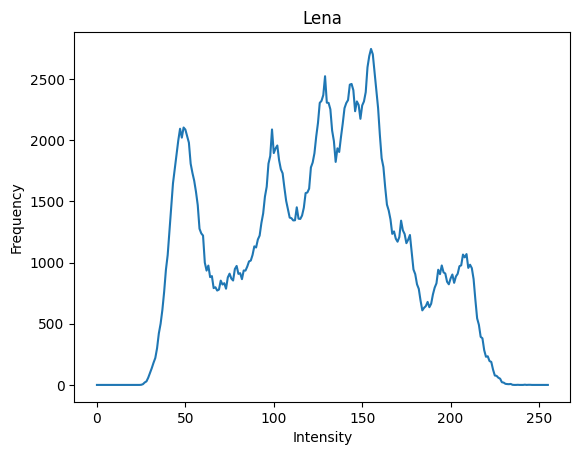

In [6]:
plot_hists(lena_hist, "Lena")

Text(0.5, 1.0, 'Lena (Before and After Histogram Equalization)')

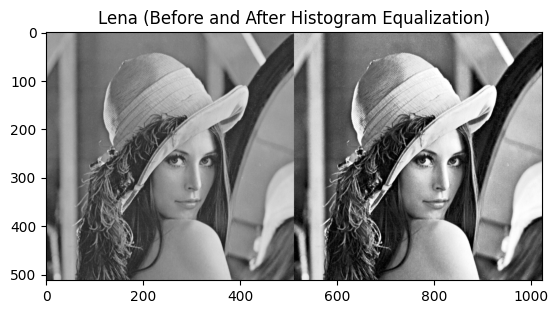

In [7]:
# D. Equalize Lena hist
equ = cv2.equalizeHist(lena)
compare = np.hstack((lena,equ))

# Plot results
plt.imshow(compare, cmap="grey")
plt.title("Lena (Before and After Histogram Equalization)")

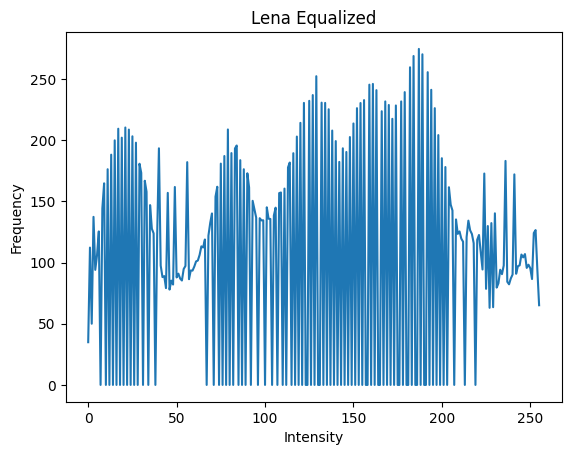

In [16]:
lena_hist_equ = cv2.calcHist([equ], [0], None, [256], [0,256])/10
plot_hists(lena_hist_equ, "Lena Equalized")

# Problem 2

In [8]:
# Apply salt and pepper noise to Lena's color image
def salt_and_pepper(img):
    # Get dimensions
    rows, cols = img.shape
    
    # Apply with a noise density of 0.05%
    density = 0.05
    num_pixels = math.floor(density*rows*cols)
    
    # Copy current image to avoid overwriting the original read image
    new_image = img.copy()
    
    # Pick a random pixel and make it black or white
    for i in range(num_pixels):
        y = random.randint(0, rows-1)
        x = random.randint(0, cols-1)
        
        # Randomly pick black or white
        value = random.choice([0,255])
        new_image[y][x] = value
    
    return new_image

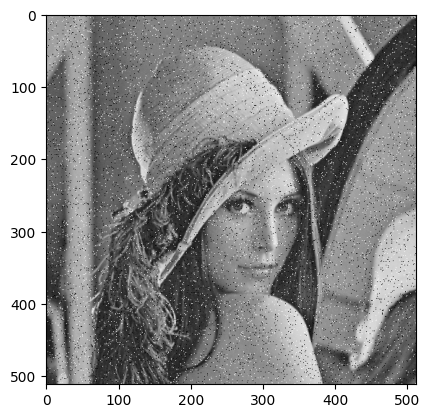

In [9]:
sp_lena = salt_and_pepper(lena)
#sp_lena.shape
plt.imshow(sp_lena, cmap="grey")

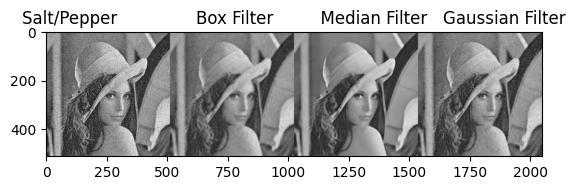

In [17]:
# Apply filters to remove noise
# Box Filter
box_image = cv2.boxFilter(sp_lena, -1, (7, 7), normalize=True)

# Median Filter
median_image = cv2.medianBlur(sp_lena, 7)

# Gaussian Filter
gauss_image = cv2.GaussianBlur(sp_lena, (7, 7), 0)
compare = np.hstack([sp_lena, box_image, median_image, gauss_image])
plt.title("Salt/Pepper               Box Filter         Median Filter   Gaussian Filter")
plt.imshow(compare, cmap="grey")